## Setup inicial

In [177]:
#!pip install -r dependencies

# Importando bibliotecas necessárias
import sidrapy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from etl import * # Importa as classes criadas para um código mais limpo
import yfinance as yf

palette = sns.color_palette('pastel')
sns.set_theme('notebook')

municípios_mt = pd.read_csv('tabelas/municipios_mt.csv')
dados = data_get(2018, 2022)

## Dados referentes à produção de soja

In [178]:
#dados.soy()
soja = pd.read_csv('tabelas/prod_soja_mt_2018_2021.csv', index_col = ['Ano'])

### Produção Mato Grosso

/tmp/ipykernel_164951/3196564509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  produção_mt = soja.groupby(by = soja.index, axis = 0).sum()
/tmp/ipykernel_164951/3196564509.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_164951/3196564509.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Quantidade produzida (Toneladas)', palette = palette)


<AxesSubplot: title={'center': 'Valor da produção (Mil reais)'}, xlabel='Ano', ylabel='Valor da produção (Mil Reais)'>

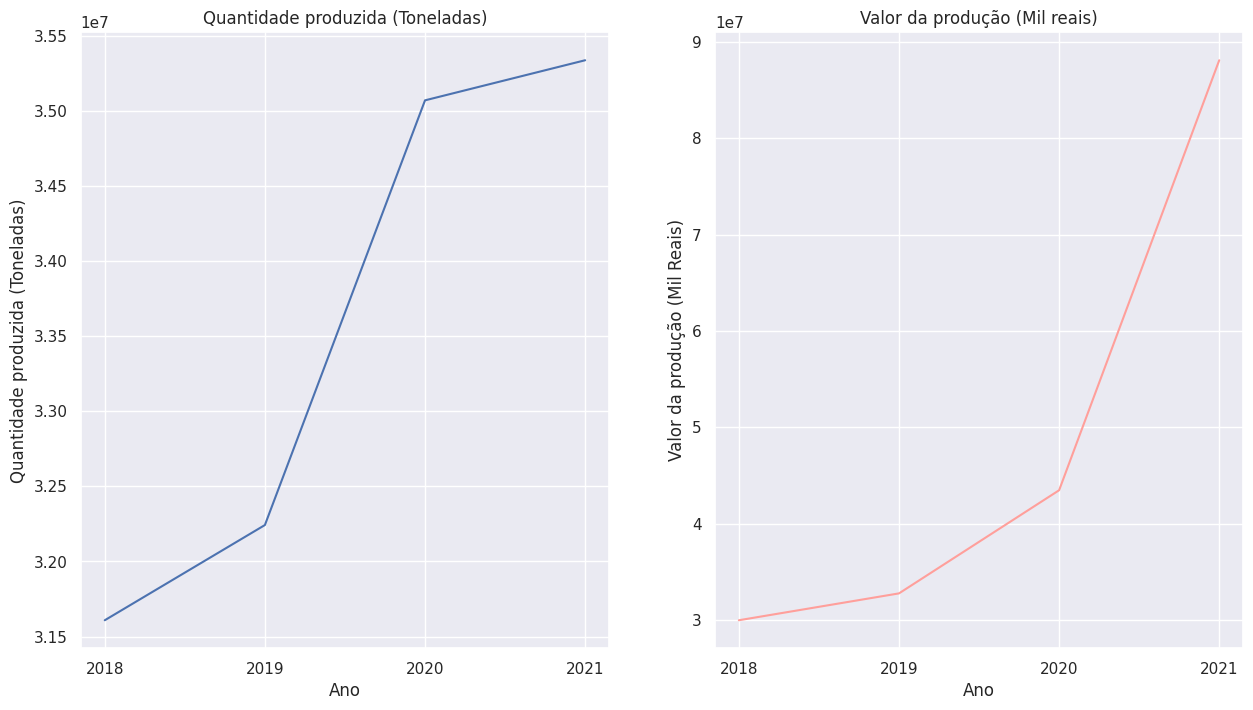

In [179]:
produção_mt = soja.groupby(by = soja.index, axis = 0).sum()

plt.figure(figsize=(15,8))
plt.title('Soja no MT - 2018 à 2021')

plt.subplot(1,2,1)
plt.title("Quantidade produzida (Toneladas)")
plt.xticks(produção_mt.index)
sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Quantidade produzida (Toneladas)', palette = palette)

plt.subplot(1,2,2)
plt.title("Valor da produção (Mil reais)")
plt.xticks(produção_mt.index)
sns.lineplot(data = produção_mt, x = produção_mt.index, y = 'Valor da produção (Mil Reais)', color = palette[3])

Sabemos que o 2021 foi um ano atípico para o mercado da soja, então precisamos fazer alguns ajustes.

O preço da tonelada 

/tmp/ipykernel_164951/2204942178.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(soja_futuro_hist, palette = palette)


Text(0, 0.5, 'Preço')

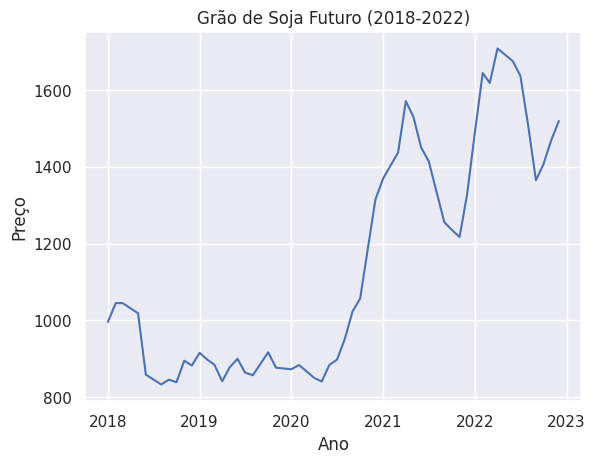

In [183]:
preco_ton = pd.DataFrame(produção_mt['Valor da produção (Mil Reais)'] *1000 / produção_mt['Quantidade produzida (Toneladas)'], columns = ['preco'])

soja_futuro = yf.Ticker('ZS=F')
soja_futuro_hist = soja_futuro.history(start = '2018-01-01', end = '2022-12-31', interval='1mo')['Close']

plt.title('Grão de Soja Futuro (2018-2022)')
sns.lineplot(soja_futuro_hist, palette = palette)
plt.xticks(['2018','2019','2020','2021', '2022', '2023'], labels=[2018, 2019, 2020, 2021, 2022, 2023])
plt.xlabel("Ano")
plt.ylabel("Preço")

In [192]:
top10_producao = soja.loc[2021].sort_values('Quantidade produzida (Toneladas)', ascending = False).head(10)
top10_producao

,Município,Quantidade produzida (Toneladas),Valor da produção (Mil Reais),Área plantada ou destinada à colheita (Hectares),Área plantada ou destinada à colheita - percentual do total geral (Percentual)
Ano,,,,,
2021,Sorriso (MT),2010960.0,4984707.0,605000.0,49.38
2021,Nova Mutum (MT),1337280.0,3298628.0,398000.0,55.95
2021,Sapezal (MT),1319731.0,3299328.0,366592.0,50.01
2021,Diamantino (MT),1315239.0,3350755.0,384605.0,52.64
2021,Campo Novo do Parecis (MT),1304958.0,3262395.0,371711.0,48.89
2021,Nova Ubiratã (MT),1301915.0,3223685.0,382677.0,51.58
2021,Querência (MT),1298304.0,3115930.0,368000.0,57.17
2021,Canarana (MT),1053000.0,2421900.0,300000.0,73.14
2021,Primavera do Leste (MT),939600.0,2426564.0,270000.0,57.20


Qual a métrica correta para dizer que um município é um grande produtor de soja? Bom, depende.

Na nossa situação vai depender do objetivo da nossa empresa fictícia. Objetivos diferentes precisam de estratégias diferentes que utilizam diferentes métricas.

O objetivo é *marketshare*? Então faz sentido sentido ordenar os municípios pela sua produção total. Se for geração de caixa então faz sentido utilizar o valor da produção.

## Dados referentes aos custos de produção

No relatório da Conab não constam todas as cidades do Mato Grosso, apenas Sorriso, Primavera do Leste e Campo Novo do Parecis 

In [155]:
sorriso_mt = pd.read_excel('tabelas/custos/custos_prod_soja_Sorriso-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)
primavera_do_leste_mt = pd.read_excel('tabelas/custos/custos_prod_soja_P. do Leste-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)
campo_novo_do_parecis_mt = pd.read_excel('tabelas/custos/custos_prod_soja_C. Novo do Parecis-MT_2018_2022.xlsx', index_col=[0,1]).fillna(0)

In [167]:
sorriso_mt_fert = sorriso_mt.loc[9.0]
primavera_do_leste_mt_fert = primavera_do_leste_mt.loc[9.0]
campo_novo_do_parecis_mt_fert = campo_novo_do_parecis_mt.loc[9.0]

fertilizantes_df = pd.concat([sorriso_mt_fert, primavera_do_leste_mt_fert, campo_novo_do_parecis_mt_fert]).transpose()
fertilizantes_df.columns = ['Sorriso', 'Primavera do Leste', 'Campo Novo do Parecis']

fertilizantes_df['Média'] = fertilizantes_df.mean(axis=1)
fertilizantes_df

,Sorriso,Primavera do Leste,Campo Novo do Parecis,Média
2018,702.20,795.80,691.63,729.876667
2019,892.50,957.06,903.60,917.720000
2020,913.50,987.05,766.22,888.923333
2021,1320.76,1046.69,910.30,1092.583333
2022,2565.44,2658.01,2244.92,2489.456667


<AxesSubplot: >

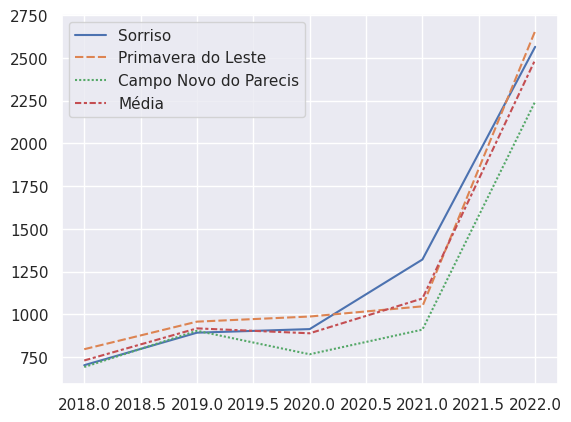

In [181]:
sns.lineplot(fertilizantes_df)